# Basics of Cluster Analysis

## Import the relevant libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the dataset

In [51]:
data = pd.read_csv('Countries-exercise.csv')

In [52]:
data

,name,Longitude,Latitude,Language
0,Aruba,-69.982677,12.520880,English
1,Afghanistan,66.004734,33.835231,Arabic
2,Angola,17.537368,-12.293361,Arabic
3,Anguilla,-63.064989,18.223959,Arabic
4,Albania,20.049834,41.142450,English
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,English
237,Yemen,47.586762,15.909280,English
238,South Africa,25.083901,-29.000341,English
239,Zambia,27.774759,-13.458242,English


## Plot the data

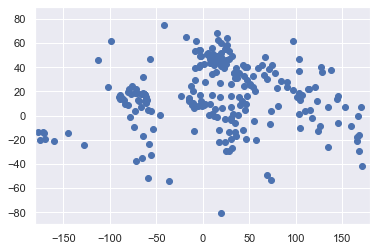

In [53]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Select the features

In [54]:
# DataFrame.iloc(row indices, columns indices)  ---- slices the data frame, given rows and columns to be kept
x = data.iloc[:,1:3]

In [55]:
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

In [64]:
kmeans = KMeans(3)

In [65]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [66]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1,
       2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [67]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Language,Cluster
0,Aruba,-69.982677,12.520880,English,1
1,Afghanistan,66.004734,33.835231,Arabic,0
2,Angola,17.537368,-12.293361,Arabic,0
3,Anguilla,-63.064989,18.223959,Arabic,1
4,Albania,20.049834,41.142450,English,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,English,1
237,Yemen,47.586762,15.909280,English,0
238,South Africa,25.083901,-29.000341,English,0
239,Zambia,27.774759,-13.458242,English,0


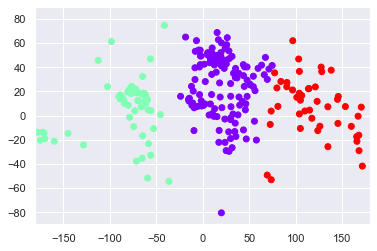

In [68]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

## Selecting the number of clusters

### WCSS

In [69]:
kmeans.inertia_

325235.52237055893

In [70]:
# Creating a loop for the entire figure in the loop
wcss = []

for i in range(1,242):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [71]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256590.58575406106,
 192194.9829002524,
 151428.48761967372,
 127277.5829200398,
 102954.36642030303,
 84945.19461239543,
 76874.40281968402,
 70181.95950086572,
 64342.50701384434,
 61051.550302904434,
 54035.92162626177,
 50354.76490614124,
 48103.545532805816,
 44449.0015717467,
 41691.300383072,
 40238.18814101981,
 36360.35898520597,
 34482.4549542201,
 32585.816264560082,
 30399.22668964348,
 29312.36716266672,
 27654.680603241708,
 25312.502859409422,
 23723.641955227446,
 22678.690171251663,
 21645.278371785076,
 20320.27260045859,
 19352.07883622908,
 18841.672766292177,
 17844.724560253144,
 17208.877988052926,
 16583.704267404806,
 16047.835861649533,
 15088.64606934938,
 14656.98273510337,
 14099.05906382591,
 13246.04869685123,
 12332.421214092481,
 12383.978569507944,
 11845.66277137911,
 11264.453371191803,
 11276.82096916532,
 10355.730905543958,
 10261.972377065005,
 10182.181480454792,
 9485.800807919475,


### The Elbow Method

Text(0, 0.5, 'Within-Clusters Sum-of-squares')

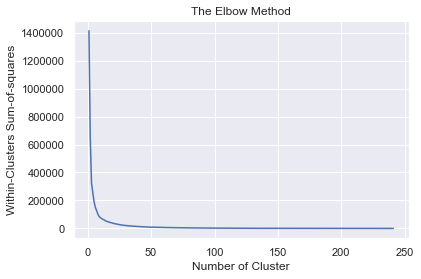

In [77]:
number_clusters = range(1,242)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('Within-Clusters Sum-of-squares')